# Loan Repayment Assessment in Banking

## Problem Statement: To build and train a model on Loan Repayment Assessment in Banking. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

pd.set_option('display.max_columns', None)

# Read Data

In [2]:
data = pd.read_csv("train_loan_data.csv")
data.shape

(80000, 28)

In [3]:
data.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type initial_list_status  int_rate  loan_amnt  \
0       MORTGAGE       Individual                   w     18.99      18075   
1           RENT       Individual                   w     10.16       8800   
2       MORTGAGE       Individual                   w     11.47      18000   
3       MORTGAGE       Individual                   w      9.16      20000   
4           RENT       Individual                   f     23.83      35000   

   num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0             1.0       1.0     319479.0         7        0   
1             4.0       0.0      19944.0         5        0   
2             4.0       2.0      23199.0         7        0   
3             4.0       1.0      72651.0        12        0   
4            14.0       7.0      64631.0        23        0   

   pub_rec_bankruptcies             purpose  revol_bal  revol_util sub_grade  \
0                   0.0  debt_consolidation       5338        93.6        E1   
1                   0.0  debt_consolidation      19944        60.3        B1   
2                   0.0  debt_consolidation      23199        88.5        B5   
3                   0.0  debt_consolidation      18425        69.0        B2   
4                   0.0  debt_consolidation      34370        90.0        F5   

         term                title  total_acc verification_status loan_status  
0   60 months   Debt consolidation          8     Source Verified   Defaulted  
1   36 months          Credit Loan         12            Verified        Paid  
2   36 months   Debt consolidation         16     Source Verified        Paid  
3   36 months   Debt consolidation         19     Source Verified        Paid  
4   60 months  Debt Connsolidation         59            Verified        Paid

In [4]:
data.tail()

addr_state  annual_inc earliest_cr_line emp_length  \
79995         SC     81000.0           Feb-00  10+ years   
79996         NH     45000.0           Aug-95  10+ years   
79997         NY     90000.0           Apr-05   < 1 year   
79998         TX     94000.0           Apr-92    3 years   
79999         NY   1100000.0           Jun-99    2 years   

                  emp_title  fico_range_high  fico_range_low grade  \
79995  Sports Group Manager              664             660     G   
79996          Web Designer              684             680     C   
79997       Program Officer              724             720     B   
79998  Sr. Business Analyst              669             665     D   
79999     Managing Director              664             660     B   

      home_ownership application_type initial_list_status  int_rate  \
79995       MORTGAGE       Individual                   w     25.89   
79996       MORTGAGE       Individual                   w     12.29   
79997            OWN       Individual                   w     10.99   
79998       MORTGAGE       Individual                   w     19.47   
79999       MORTGAGE       Individual                   w     10.78   

       loan_amnt  num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
79995      25850             5.0       4.0     220521.0        12        0   
79996       6975             2.0       2.0     245781.0         7        0   
79997       7000             1.0       3.0     382274.0         9        0   
79998      18000             3.0       3.0     201841.0        16        1   
79999      20000             4.0       2.0    3046776.0        13        0   

       pub_rec_bankruptcies             purpose  revol_bal  revol_util  \
79995                   0.0  debt_consolidation      20201        93.5   
79996                   0.0  debt_consolidation       6145        56.9   
79997                   0.0  debt_consolidation       3910        25.6   
79998                   1.0         credit_card      11897        49.4   
79999                   0.0  debt_consolidation     586259        96.7   

      sub_grade        term                    title  total_acc  \
79995        G3   60 months       Debt consolidation         42   
79996        C1   36 months       Debt consolidation         14   
79997        B4   36 months       Debt consolidation         26   
79998        D5   60 months  Credit card refinancing         48   
79999        B4   36 months       Debt consolidation         32   

      verification_status loan_status  
79995            Verified   Defaulted  
79996        Not Verified        Paid  
79997     Source Verified        Paid  
79998     Source Verified        Paid  
79999     Source Verified        Paid

In [5]:
data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
## Count and Dtype of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [7]:
## Descriptive Statistics
data.describe().T

count           mean            std     min       25%  \
annual_inc            80000.0   76046.143138   69020.055377    0.00  46000.00   
fico_range_high       80000.0     699.987975      31.734840  664.00    674.00   
fico_range_low        80000.0     695.987813      31.734075  660.00    670.00   
int_rate              80000.0      13.232898       4.771705    5.31      9.75   
loan_amnt             80000.0   14403.867813    8703.826298  750.00   7925.00   
num_actv_bc_tl        76052.0       3.633790       2.262505    0.00      2.00   
mort_acc              77229.0       1.674759       2.005104    0.00      0.00   
tot_cur_bal           76052.0  141586.358991  159371.366632    0.00  29642.00   
open_acc              80000.0      11.605675       5.483362    1.00      8.00   
pub_rec               80000.0       0.216675       0.579854    0.00      0.00   
pub_rec_bankruptcies  79969.0       0.137103       0.383202    0.00      0.00   
revol_bal             80000.0   16289.340975   22649.147472    0.00   5965.75   
revol_util            79947.0      51.899142      24.504836    0.00     33.50   
total_acc             80000.0      25.036875      12.009194    2.00     16.00   

                           50%        75%         max  
annual_inc            65000.00   90000.00  7141778.00  
fico_range_high         694.00     714.00      850.00  
fico_range_low          690.00     710.00      845.00  
int_rate                 12.74      15.99       30.99  
loan_amnt             12000.00   20000.00    40000.00  
num_actv_bc_tl            3.00       5.00       32.00  
mort_acc                  1.00       3.00       32.00  
tot_cur_bal           81000.50  211027.25  5172185.00  
open_acc                 11.00      14.00       80.00  
pub_rec                   0.00       0.00       24.00  
pub_rec_bankruptcies      0.00       0.00        7.00  
revol_bal             11111.00   19635.00  1023940.00  
revol_util               52.20      70.80      152.60  
total_acc                23.00      32.00      162.00

# Finding and Handling Duplicated Values if found

In [8]:
## Duplicate Values
data.duplicated().any()

False

# Finding and Handling Null values if found

In [9]:
## Sum of Null Values in each row
data.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

<Axes: >

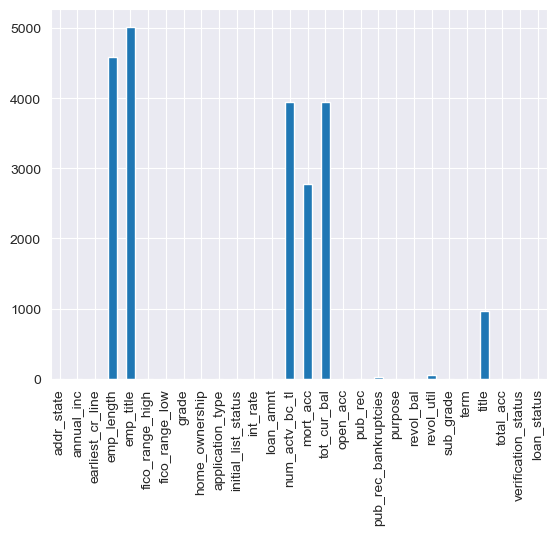

In [10]:
##Plotting Null Values

sns.set_style(style = 'darkgrid')
data.isnull().sum().plot(kind ='bar')

In [44]:
## Imputing Null values

data['emp_length'].fillna(data['emp_length'].mode()[0], inplace=True)
data['emp_title'].fillna(data['emp_title'].mode()[0], inplace=True)
data['title'].fillna(data['title'].mode()[0], inplace=True)

data.num_actv_bc_tl = data.num_actv_bc_tl.fillna(data.num_actv_bc_tl.mean())
data.mort_acc = data.mort_acc.fillna(data.mort_acc.mean())

data['tot_cur_bal'].fillna(data['tot_cur_bal'].mean(), inplace=True)
data['revol_util'].fillna(data['revol_util'].mean(), inplace=True)
data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mean(), inplace=True)

In [45]:
## Sum of Null Values in each row
data.isnull().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

## Finding and Handling Outliers

In [46]:
data.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type initial_list_status  int_rate  loan_amnt  \
0       MORTGAGE       Individual                   w     18.99      18075   
1           RENT       Individual                   w     10.16       8800   
2       MORTGAGE       Individual                   w     11.47      18000   
3       MORTGAGE       Individual                   w      9.16      20000   
4           RENT       Individual                   f     23.83      35000   

   num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0             1.0       1.0     319479.0         7        0   
1             4.0       0.0      19944.0         5        0   
2             4.0       2.0      23199.0         7        0   
3             4.0       1.0      72651.0        12        0   
4            14.0       7.0      64631.0        23        0   

   pub_rec_bankruptcies             purpose  revol_bal  revol_util sub_grade  \
0                   0.0  debt_consolidation       5338        93.6        E1   
1                   0.0  debt_consolidation      19944        60.3        B1   
2                   0.0  debt_consolidation      23199        88.5        B5   
3                   0.0  debt_consolidation      18425        69.0        B2   
4                   0.0  debt_consolidation      34370        90.0        F5   

         term                title  total_acc verification_status loan_status  
0   60 months   Debt consolidation          8     Source Verified   Defaulted  
1   36 months          Credit Loan         12            Verified        Paid  
2   36 months   Debt consolidation         16     Source Verified        Paid  
3   36 months   Debt consolidation         19     Source Verified        Paid  
4   60 months  Debt Connsolidation         59            Verified        Paid

In [47]:
### Boxplot for Outliers

Text(0, 0.5, 'Values')

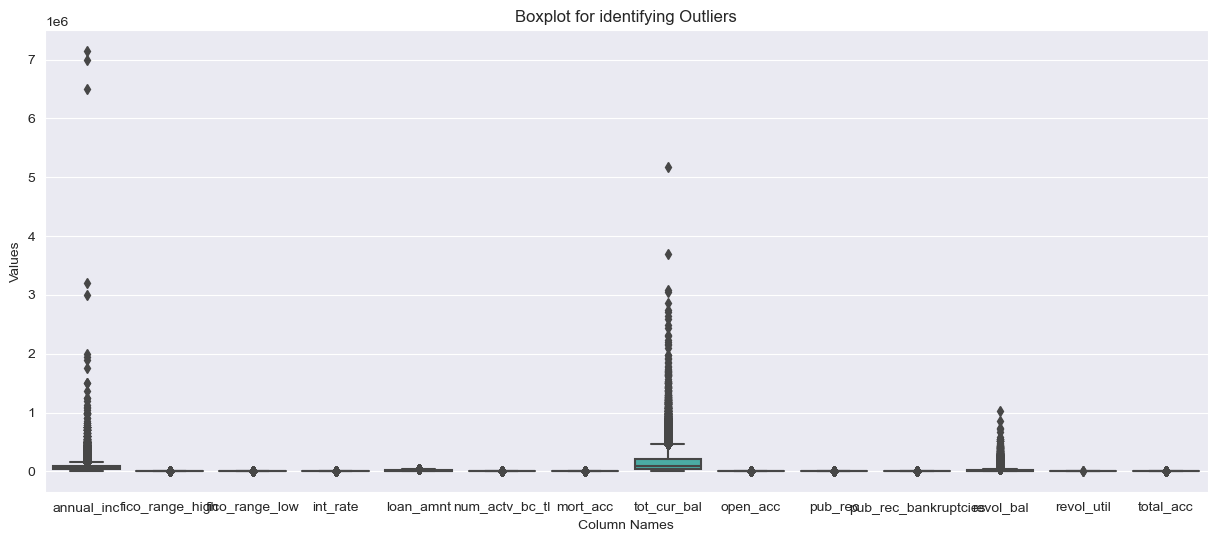

In [48]:
plt.figure(figsize=(15,6))
sns.boxplot(data)
plt.title('Boxplot for identifying Outliers')
plt.xlabel('Column Names')
plt.ylabel('Values')

The above figure shows the outliers.

In [49]:
data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

Getting more detailed view on outliers

Text(0, 0.5, 'Values')

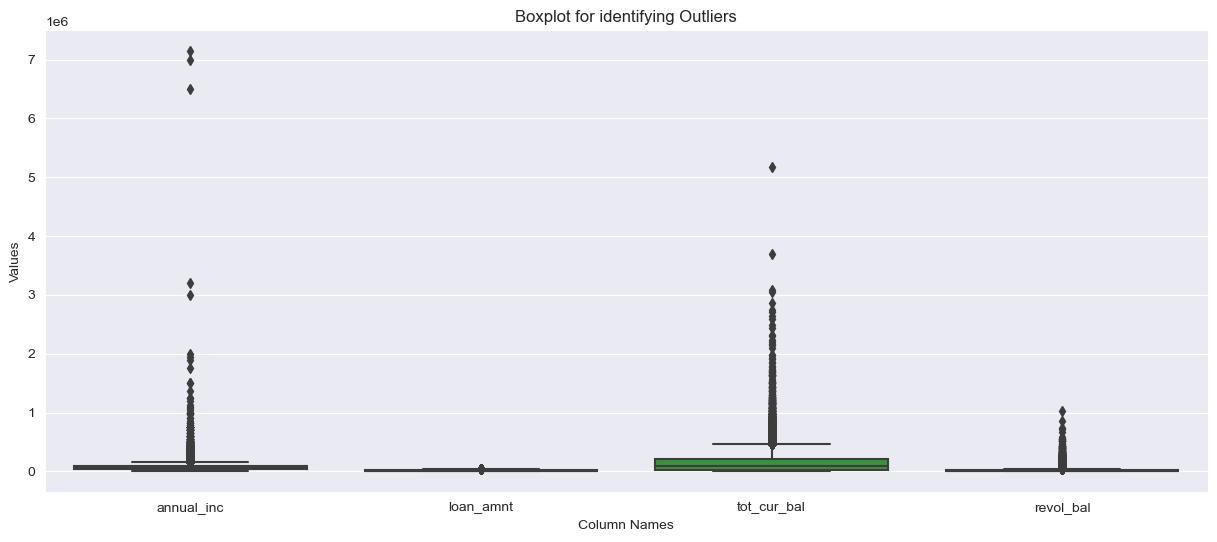

In [50]:
plt.figure(figsize=(15,6))
sns.boxplot(data[['annual_inc', 'loan_amnt', 'tot_cur_bal', 'revol_bal']])
plt.title('Boxplot for identifying Outliers')
plt.xlabel('Column Names')
plt.ylabel('Values')

## Finding Outliers using Z Scores


In [51]:
# Calculate Z-scores for outlier numeric column
z_scores = data[['annual_inc', 'tot_cur_bal', 'revol_bal']].apply(zscore)

#Threshold
z_score_threshold = 3

# Identify outliers
outliers = (z_scores.abs() > z_score_threshold)

In [52]:
# Outliers Count
outlier_counts = outliers.sum()
print("Outlier Counts:")
print(outlier_counts)

Outlier Counts:
annual_inc      586
tot_cur_bal    1143
revol_bal      1017
dtype: int64


In [53]:
## Identify outliers and prepare cleaned data by removing outliers
outlier_indices = (z_scores > z_score_threshold).any(axis=1)
cleaned_data = data[~outlier_indices]

In [54]:
cleaned_data

addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0           Jul-97  10+ years   
1             CA     40000.0           Apr-87  10+ years   
2             FL     60000.0           Aug-07  10+ years   
3             IL    100742.0           Sep-80  10+ years   
4             MD     80000.0           Jul-99  10+ years   
...          ...         ...              ...        ...   
79994         TN     60000.0           Aug-08   < 1 year   
79995         SC     81000.0           Feb-00  10+ years   
79996         NH     45000.0           Aug-95  10+ years   
79997         NY     90000.0           Apr-05   < 1 year   
79998         TX     94000.0           Apr-92    3 years   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy              744             740     E   
1      Department of Veterans Affairs              724             720     B   
2                    Marble polishing              679             675     B   
3                             printer              664             660     B   
4                       Southern Mgmt              669             665     F   
...                               ...              ...             ...   ...   
79994      Physical Therapy Assistant              689             685     D   
79995            Sports Group Manager              664             660     G   
79996                    Web Designer              684             680     C   
79997                 Program Officer              724             720     B   
79998            Sr. Business Analyst              669             665     D   

      home_ownership application_type initial_list_status  int_rate  \
0           MORTGAGE       Individual                   w     18.99   
1               RENT       Individual                   w     10.16   
2           MORTGAGE       Individual                   w     11.47   
3           MORTGAGE       Individual                   w      9.16   
4               RENT       Individual                   f     23.83   
...              ...              ...                 ...       ...   
79994           RENT       Individual                   w     19.03   
79995       MORTGAGE       Individual                   w     25.89   
79996       MORTGAGE       Individual                   w     12.29   
79997            OWN       Individual                   w     10.99   
79998       MORTGAGE       Individual                   w     19.47   

       loan_amnt  num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0          18075             1.0       1.0     319479.0         7        0   
1           8800             4.0       0.0      19944.0         5        0   
2          18000             4.0       2.0      23199.0         7        0   
3          20000             4.0       1.0      72651.0        12        0   
4          35000            14.0       7.0      64631.0        23        0   
...          ...             ...       ...          ...       ...      ...   
79994       5000             2.0       0.0      31795.0         8        0   
79995      25850             5.0       4.0     220521.0        12        0   
79996       6975             2.0       2.0     245781.0         7        0   
79997       7000             1.0       3.0     382274.0         9        0   
79998      18000             3.0       3.0     201841.0        16        1   

       pub_rec_bankruptcies             purpose  revol_bal  revol_util  \
0                       0.0  debt_consolidation       5338        93.6   
1                       0.0  debt_consolidation      19944        60.3   
2                       0.0  debt_consolidation      23199        88.5   
3                       0.0  debt_consolidation      18425        69.0   
4                       0.0  debt_consolidation      34370        90.0   
...                     ...                 ...        ...         ...   
79994           

In [55]:
#Seperating Categorical and Numerical Columns

In [56]:
categorical = []
numerical = []
for col in cleaned_data.columns:
    if cleaned_data[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)
categorical, numerical

(['addr_state',
  'earliest_cr_line',
  'emp_length',
  'emp_title',
  'grade',
  'home_ownership',
  'application_type',
  'initial_list_status',
  'purpose',
  'sub_grade',
  'term',
  'title',
  'verification_status',
  'loan_status'],
 ['annual_inc',
  'fico_range_high',
  'fico_range_low',
  'int_rate',
  'loan_amnt',
  'num_actv_bc_tl',
  'mort_acc',
  'tot_cur_bal',
  'open_acc',
  'pub_rec',
  'pub_rec_bankruptcies',
  'revol_bal',
  'revol_util',
  'total_acc'])

## Data Visualization

### Plot 1: Distribution Of Loan status based on Customer's grade

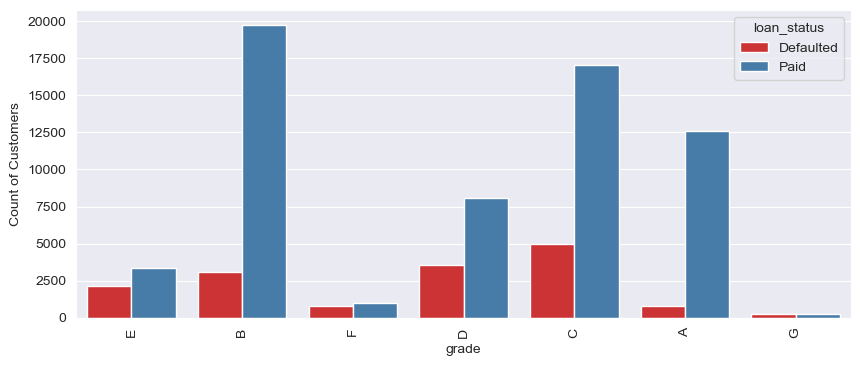

In [57]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize= (10,4))
sns.countplot(x = 'grade', data = cleaned_data, hue = 'loan_status', palette="Set1")
plt.ylabel('Count of Customers')
plt.xticks(rotation = 90)
plt.show()

Grade D and C have more defaulters compared to others

### Plot 2: Distribution Of Loan status based on Customer's home ownership

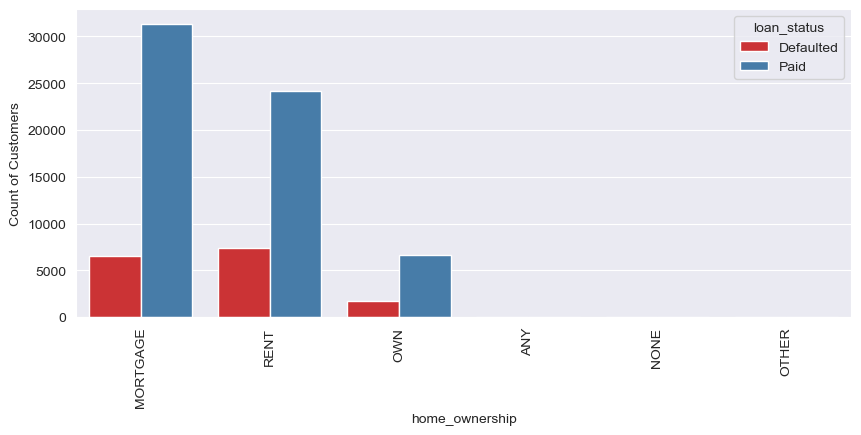

In [58]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize= (10,4))
sns.countplot(x = 'home_ownership', data = cleaned_data, hue = 'loan_status', palette="Set1")
plt.ylabel('Count of Customers')
plt.xticks(rotation = 90)
plt.show()

Customers with own home has less defaulters compared to Mortagage and rented customers.

### Plot 3: Distribution Of Loan status based on Customer's total Experience

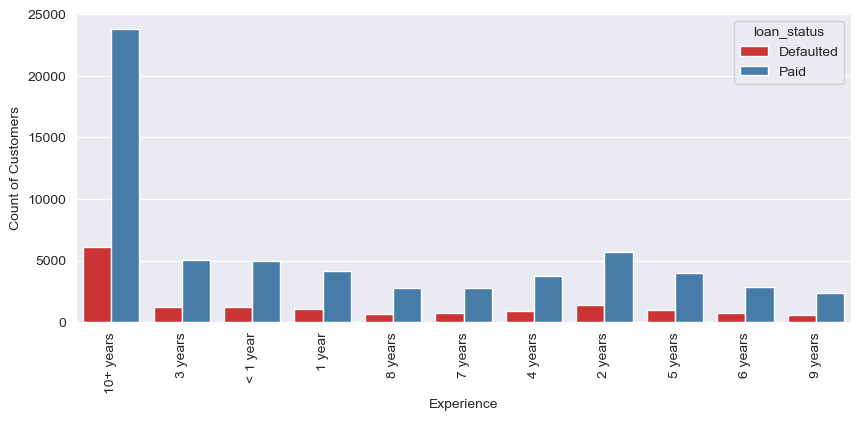

In [59]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize= (10,4))
sns.countplot(x = 'emp_length', data = cleaned_data, hue = 'loan_status', palette="Set1")
plt.ylabel('Count of Customers')
plt.xlabel('Experience')
plt.xticks(rotation = 90)
plt.show()

### Plot 4: Distribution Of Loan status based on Purpose

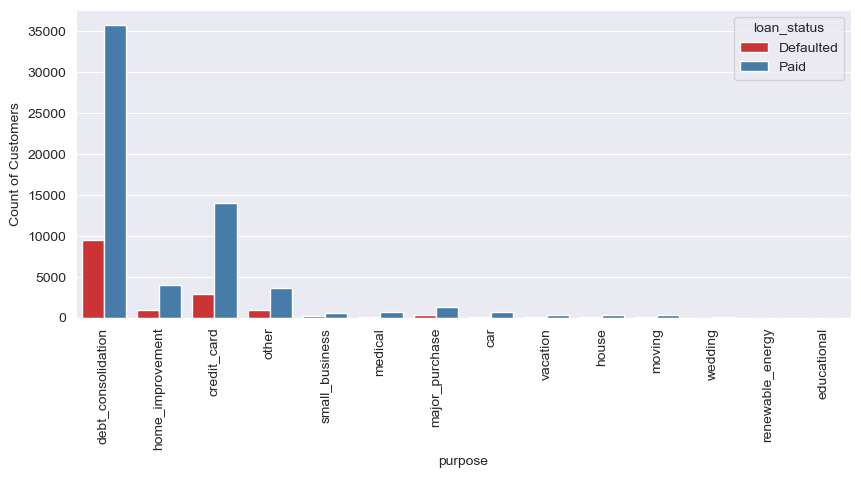

In [60]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize= (10,4))
sns.countplot(x = 'purpose', data = cleaned_data, hue = 'loan_status', palette="Set1")
plt.ylabel('Count of Customers')
plt.xticks(rotation = 90)
plt.show()

Debt consolidation and credit card repayments have more defaulters and paid customers compared to others

###  Plot 5: Distribution Of Loan status based on Verification status

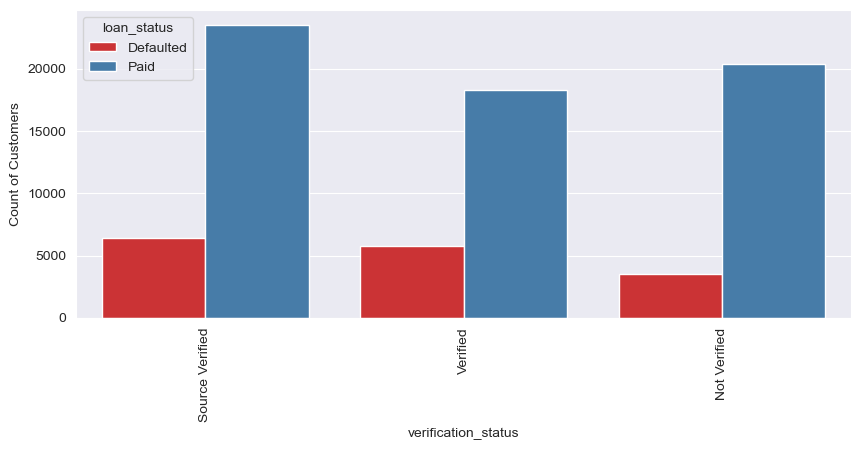

In [61]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize= (10,4))
sns.countplot(x = 'verification_status', data = cleaned_data, hue = 'loan_status', palette="Set1")
plt.ylabel('Count of Customers')
plt.xticks(rotation = 90)
plt.show()

### Plot 6: Distribution Of Loan status based on Term

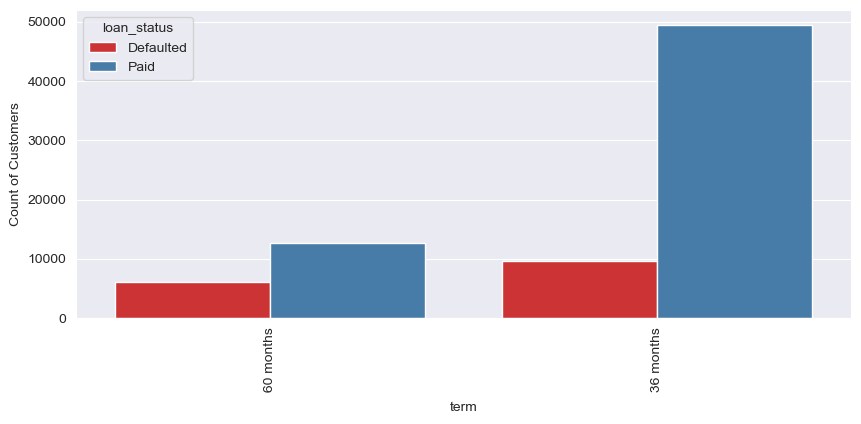

In [62]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize= (10,4))
sns.countplot(x = 'term', data = cleaned_data, hue = 'loan_status', palette="Set1")
plt.ylabel('Count of Customers')
plt.xticks(rotation = 90)
plt.show()

36 months term customers have more defautlters compared to 60 months

### Plot 7: Pairplot For Numerical Columns 

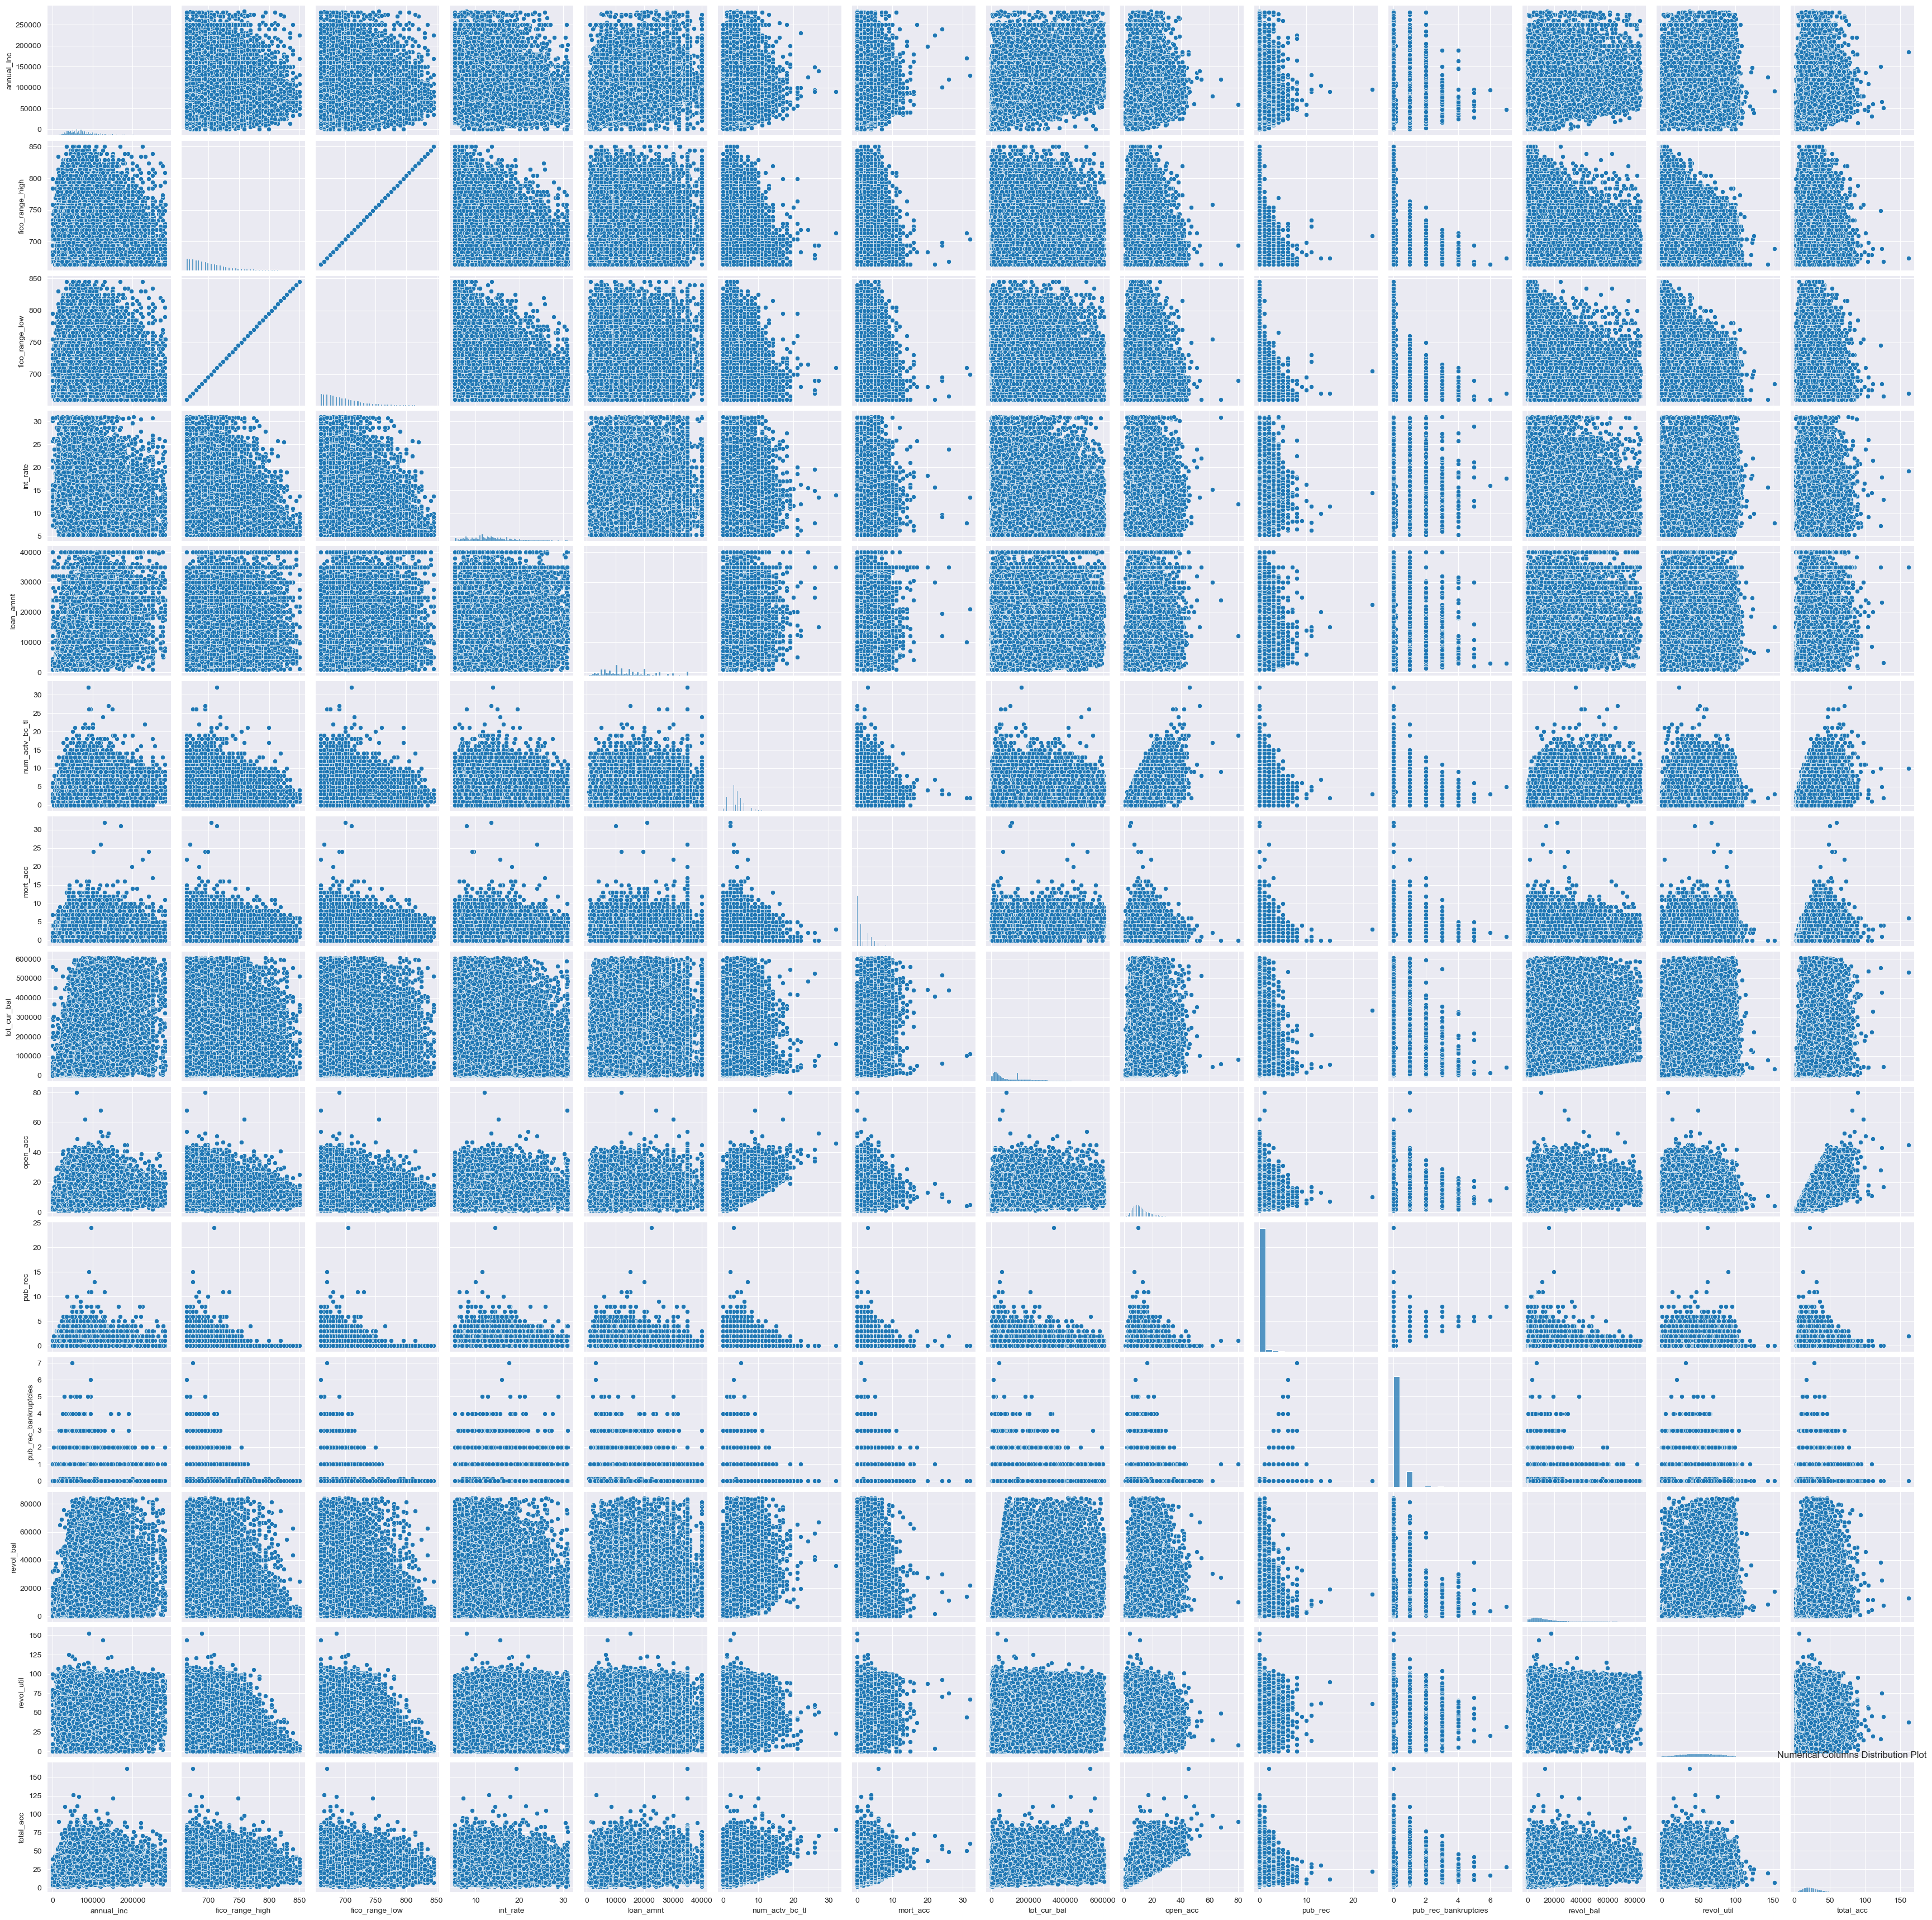

In [63]:
sns.pairplot(data = cleaned_data)
plt.title('Numerical Columns Distribution Plot')
plt.show()

Pairplot Displays the distribution between all numerical columns

### Plot 8: Distribution on Outcome with loan status column

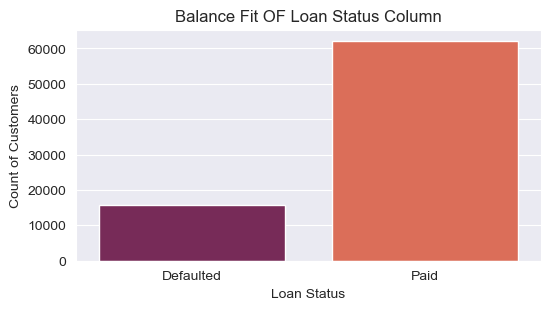

In [31]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'loan_status', data = cleaned_data, palette='rocket')
plt.title('Balance Fit OF Loan Status Column')
plt.xlabel('Loan Status')
plt.ylabel('Count of Customers')
plt.show()

**The countplot clearly displays that the data is highly imbalanced in the target column**

# Feature Engineering


As the categorical columns are related opted for Label Encoding and for Scaling opted for Standar Scaler

### Encoding the Categorical Columns

In [64]:
## Define encoder
encoder = LabelEncoder()

In [65]:
for col in categorical:
    cleaned_data[col] =  encoder.fit_transform(cleaned_data[col])

In [66]:
cleaned_data

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0               5     85000.0               315           1       7784   
1               4     40000.0                40           1       7730   
2               9     60000.0                60           1      16791   
3              14    100742.0               617           1      34405   
4              20     80000.0               317           1      25959   
...           ...         ...               ...         ...        ...   
79994          42     60000.0                61          10      20325   
79995          40     81000.0               155           1      26110   
79996          30     45000.0                99           1      30523   
79997          34     90000.0                 5          10      21326   
79998          43     94000.0                45           3      26467   

       fico_range_high  fico_range_low  grade  home_ownership  \
0                  744             740      4               1   
1                  724             720      1               5   
2                  679             675      1               1   
3                  664             660      1               1   
4                  669             665      5               5   
...                ...             ...    ...             ...   
79994              689             685      3               5   
79995              664             660      6               1   
79996              684             680      2               1   
79997              724             720      1               4   
79998              669             665      3               1   

       application_type  initial_list_status  int_rate  loan_amnt  \
0                     0                    1     18.99      18075   
1                     0                    1     10.16       8800   
2                     0                    1     11.47      18000   
3                     0                    1      9.16      20000   
4                     0                    0     23.83      35000   
...                 ...                  ...       ...        ...   
79994                 0                    1     19.03       5000   
79995                 0                    1     25.89      25850   
79996                 0                    1     12.29       6975   
79997                 0                    1     10.99       7000   
79998                 0                    1     19.47      18000   

       num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0                 1.0       1.0     319479.0         7        0   
1                 4.0       0.0      19944.0         5        0   
2                 4.0       2.0      23199.0         7        0   
3                 4.0       1.0      72651.0        12        0   
4                14.0       7.0      64631.0        23        0   
...               ...       ...          ...       ...      ...   
79994             2.0       0.0      31795.0         8        0   
79995             5.0       4.0     220521.0        12        0   
79996             2.0       2.0     245781.0         7        0   
79997             1.0       3.0     382274.0         9        0   
79998             3.0       3.0     201841.0        16        1   

       pub_rec_bankruptcies  purpose  revol_bal  revol_util  sub_grade  term  \
0                       0.0        2       5338        93.6         20     1   
1                       0.0        2      19944        60.3          5     0   
2                       0.0        2      23199        88.5          9     0   
3                       0.0        2      18425        69.0          6     0   
4                       0.0        2      34370        90.0         29     1   
...                     ...      ...        ...         ...        ...   ...   
79994                   0.0        9       3095        36.4         17     0   
79995                   0.0        2      20201        93.5    

### Scaling the Numerical Columns

In [67]:
## Define Scaler
sc_x = StandardScaler()

## Perform Scaling using fit_transform
cleaned_data[numerical] = sc_x.fit_transform(cleaned_data[numerical])

## Display data after scaling
cleaned_data

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0               5    0.359857               315           1       7784   
1               4   -0.844024                40           1       7730   
2               9   -0.308965                60           1      16791   
3              14    0.781002               617           1      34405   
4              20    0.226093               317           1      25959   
...           ...         ...               ...         ...        ...   
79994          42   -0.308965                61          10      20325   
79995          40    0.252846               155           1      26110   
79996          30   -0.710259                99           1      30523   
79997          34    0.493622                 5          10      21326   
79998          43    0.600633                45           3      26467   

       fico_range_high  fico_range_low  grade  home_ownership  \
0             1.400309        1.400349      4               1   
1             0.768281        0.768306      1               5   
2            -0.653781       -0.653792      1               1   
3            -1.127801       -1.127824      1               1   
4            -0.969795       -0.969813      5               5   
...                ...             ...    ...             ...   
79994        -0.337767       -0.337770      3               5   
79995        -1.127801       -1.127824      6               1   
79996        -0.495774       -0.495781      2               1   
79997         0.768281        0.768306      1               4   
79998        -0.969795       -0.969813      3               1   

       application_type  initial_list_status  int_rate  loan_amnt  \
0                     0                    1  1.200556   0.458982   
1                     0                    1 -0.652165  -0.627760   
2                     0                    1 -0.377300   0.450194   
3                     0                    1 -0.861986   0.684532   
4                     0                    0  2.216090   2.442066   
...                 ...                  ...       ...        ...   
79994                 0                    1  1.208948  -1.073002   
79995                 0                    1  2.648322   1.369970   
79996                 0                    1 -0.205246  -0.841593   
79997                 0                    1 -0.478014  -0.838664   
79998                 0                    1  1.301270   0.450194   

       num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc   pub_rec  \
0           -1.197539 -0.322677     1.544283 -0.831668 -0.377104   
1            0.181704 -0.847351    -0.885353 -1.199183 -0.377104   
2            0.181704  0.201997    -0.858951 -0.831668 -0.377104   
3            0.181704 -0.322677    -0.457828  0.087119 -0.377104   
4            4.779178  2.825367    -0.522881  2.108450 -0.377104   
...               ...       ...          ...       ...       ...   
79994       -0.737791 -0.847351    -0.789226 -0.647911 -0.377104   
79995        0.641451  1.251345     0.741599  0.087119 -0.377104   
79996       -0.737791  0.201997     0.946492 -0.831668 -0.377104   
79997       -1.197539  0.726671     2.053636 -0.464153 -0.377104   
79998       -0.278044  0.726671     0.590079  0.822148  1.344520   

       pub_rec_bankruptcies  purpose  revol_bal  revol_util  sub_grade  term  \
0                 -0.361793        2  -0.729232    1.714558         20     1   
1                 -0.361793        2   0.460654    0.351474          5     0   
2                 -0.361793        2   0.725825    1.505797          9     0   
3                 -0.361793        2   0.336908    0.707595          6     0   
4                 -0.361793        2   1.635877    1.567197         29     1   
...                     ...      ...        ...         ...        ...   ...   
79994             -0.361793        9  -0.911959   -0.626834         17     0   
79995             -0.361793        2   0.481591    

In [68]:
## Train and Test Split

In [69]:
## Define X and y
X = cleaned_data.drop('loan_status', axis = True)
y = cleaned_data['loan_status']


## Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Print Shape of train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54494, 27)
(23355, 27)
(54494,)
(23355,)


In [70]:
## Sampling the Training Dataset

In [71]:
## Define Under Sampler
under = RandomUnderSampler(sampling_strategy=0.5)

## Define Over Sampler
over = SMOTE(sampling_strategy=0.5)

In [72]:
# Apply under-sampling to the training data
x_train_, y_train_ = under.fit_resample(X_train, y_train)

# Apply over-sampling to the under-sampled training data
x_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)

In [73]:
## Print resampled Data shape
print(x_train_resampled.shape)
print(y_train_resampled.shape)

(65239, 27)
(65239,)


# Model Selection

## 1. Logistic Regression Classifier

In [75]:
## Define Model
lgr = LogisticRegression()

# Train Model
lgr.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

In [76]:
## Predict Test data
lgr_pred = lgr.predict(X_test)

--------------------------------------------------
Logistic Regression Model Accuracy: 0.7655320059944337
--------------------------------------------------
Logistic Regression Model ROC AUC Score: 0.5733327502089529
--------------------------------------------------
Logistic Regression Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.37      0.25      0.30      4677
           1       0.83      0.89      0.86     18678

    accuracy                           0.77     23355
   macro avg       0.60      0.57      0.58     23355
weighted avg       0.74      0.77      0.75     23355

--------------------------------------------------


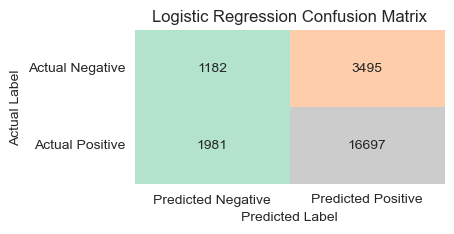

In [77]:
### Performance Evaluation

### Accuracy Score
lgr_accuracy = accuracy_score(y_test, lgr_pred)
print("-"*50)
print("Logistic Regression Model Accuracy:", lgr_accuracy)

### ROC AUC Score
lgr_roc = roc_auc_score(y_test, lgr_pred)
print("-"*50)
print("Logistic Regression Model ROC AUC Score:", lgr_roc)

### Classification Report
print("-"*50)
print("Logistic Regression Model Classiffication Report: \n\n",classification_report(y_test, lgr_pred))
print("-"*50)

## Confusion Matrix
lgr_confusion_matrix = confusion_matrix(y_test, lgr_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(lgr_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

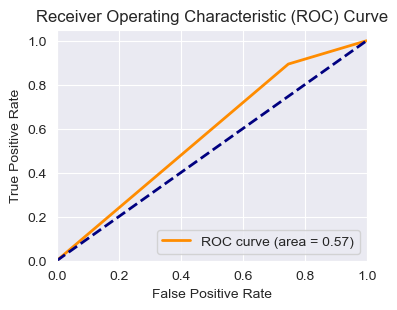

In [78]:
## Plotting ROC Curve 

# Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,lgr_pred)

# Define AUC
roc_auc = auc(fpr, tpr)

## PlotROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

## 2. Decision Tree Classifier

In [80]:
## Define Model
dtc = DecisionTreeClassifier()

# Train Model
dtc.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier()

In [81]:
## Predict Test data
dtc_pred = dtc.predict(X_test)

--------------------------------------------------
Decision Tree Model Accuracy: 0.6862770284735603
--------------------------------------------------
Decision Tree Model ROC AUC Score: 0.5528720901904536
--------------------------------------------------
Decision Tree Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.27      0.33      0.30      4677
           1       0.82      0.78      0.80     18678

    accuracy                           0.69     23355
   macro avg       0.55      0.55      0.55     23355
weighted avg       0.71      0.69      0.70     23355

--------------------------------------------------


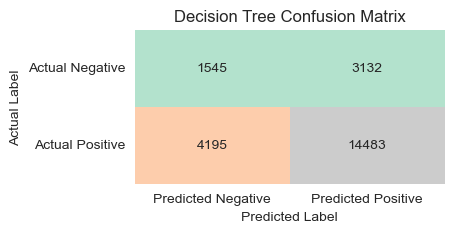

In [82]:
### Performance Evaluation

### Accuracy Score
dtc_accuracy = accuracy_score(y_test, dtc_pred)
print("-"*50)
print("Decision Tree Model Accuracy:", dtc_accuracy)

### ROC AUC Score
dtc_roc = roc_auc_score(y_test, dtc_pred)
print("-"*50)
print("Decision Tree Model ROC AUC Score:", dtc_roc)

### Classification Report
print("-"*50)
print("Decision Tree Model Classiffication Report: \n\n",classification_report(y_test, dtc_pred))
print("-"*50)

## Confusion Matrix
dtc_confusion_matrix = confusion_matrix(y_test, dtc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(dtc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

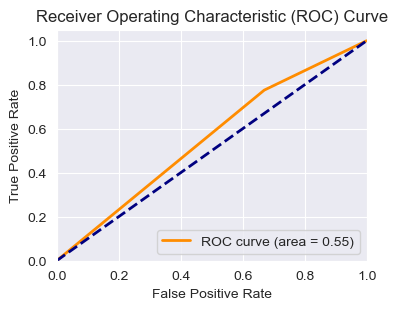

In [83]:
## Plotting ROC Curve 

# Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,dtc_pred)

## Define AUC
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# 3. Random Forest Classifier

In [84]:
## Define Model
rfc = RandomForestClassifier() 

# Train Model
rfc.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier()

In [85]:
## Predict Test data
rfc_pred = rfc.predict(X_test)

--------------------------------------------------
Random Forest Model Accuracy: 0.7943909227146221
--------------------------------------------------
Random Forest Model ROC AUC Score: 0.5370427015321473
--------------------------------------------------
Random Forest Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.44      0.11      0.17      4677
           1       0.81      0.97      0.88     18678

    accuracy                           0.79     23355
   macro avg       0.63      0.54      0.53     23355
weighted avg       0.74      0.79      0.74     23355

--------------------------------------------------


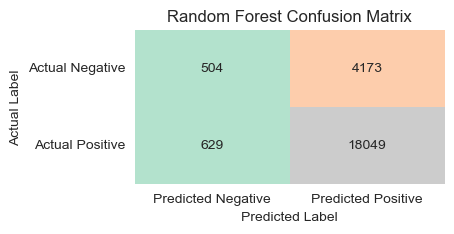

In [86]:
### Performance Evaluation

### Accuracy Score
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print("-"*50)
print("Random Forest Model Accuracy:", rfc_accuracy)

### ROC AUC Score
rfc_roc = roc_auc_score(y_test, rfc_pred)
print("-"*50)
print("Random Forest Model ROC AUC Score:", rfc_roc)

### Classification Report
print("-"*50)
print("Random Forest Model Classiffication Report: \n\n",classification_report(y_test, rfc_pred))
print("-"*50)

## Confusion Matrix
rfc_confusion_matrix = confusion_matrix(y_test, rfc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(rfc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

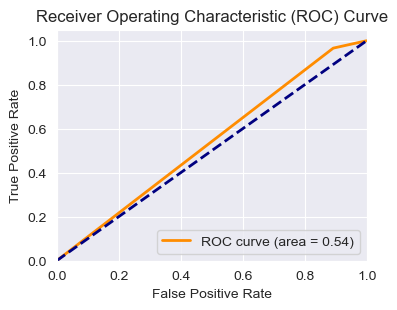

In [87]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,rfc_pred)
## Define Auc
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# 4. Gradient Boosting Classifier

In [88]:
## Define Model
gbc = GradientBoostingClassifier()

# Train Model
gbc.fit(x_train_resampled,y_train_resampled)

GradientBoostingClassifier()

In [94]:
## Predict Test data
gbc_pred = gbc.predict(X_test)

--------------------------------------------------
Gradient Boosting Model Accuracy: 0.7973453222008136
--------------------------------------------------
Gradient Boosting Model ROC AUC Score: 0.5254268329663222
--------------------------------------------------
Gradient Boosting Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.46      0.07      0.12      4677
           1       0.81      0.98      0.89     18678

    accuracy                           0.80     23355
   macro avg       0.63      0.53      0.50     23355
weighted avg       0.74      0.80      0.73     23355

--------------------------------------------------


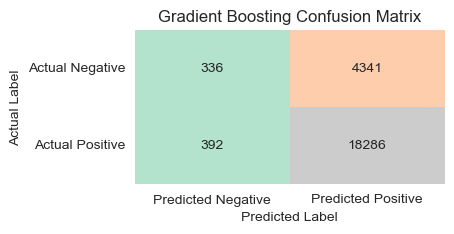

In [95]:
### Performance Evaluation

### Accuracy Score
gbc_accuracy = accuracy_score(y_test, gbc_pred)
print("-"*50)
print("Gradient Boosting Model Accuracy:", gbc_accuracy)

### ROC AUC Score
gbc_roc = roc_auc_score(y_test, gbc_pred)
print("-"*50)
print("Gradient Boosting Model ROC AUC Score:", gbc_roc)

### Classification Report
print("-"*50)
print("Gradient Boosting Model Classiffication Report: \n\n",classification_report(y_test, gbc_pred))
print("-"*50)

## Confusion Matrix
gbc_confusion_matrix = confusion_matrix(y_test, gbc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(gbc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

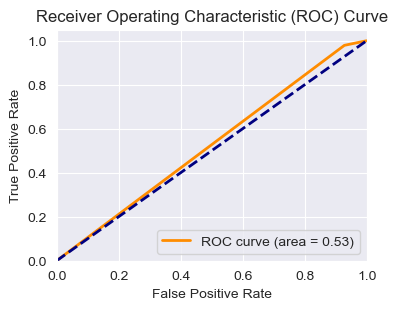

In [97]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,gbc_pred)
## Define AUC
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# 5. Support Vector Machines

In [98]:
## Define Model
svc = SVC()

# Train Model
svc.fit(x_train_resampled,y_train_resampled)

SVC()

In [99]:
## Predict Test data
svc_pred = svc.predict(X_test)

--------------------------------------------------
Support Vector Model Accuracy: 0.7997430956968529
--------------------------------------------------
Support Vector Model ROC AUC Score: 0.5
--------------------------------------------------
Support Vector Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4677
           1       0.80      1.00      0.89     18678

    accuracy                           0.80     23355
   macro avg       0.40      0.50      0.44     23355
weighted avg       0.64      0.80      0.71     23355

--------------------------------------------------


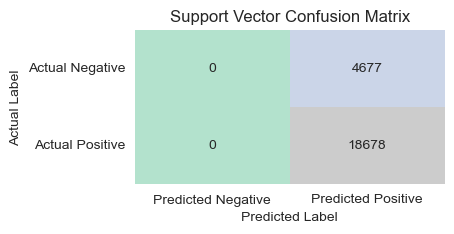

In [100]:
### Performance Evaluation

### Accuracy Score
svc_accuracy = accuracy_score(y_test, svc_pred)
print("-"*50)
print("Support Vector Model Accuracy:", svc_accuracy)

### ROC AUC Score
svc_roc = roc_auc_score(y_test, svc_pred)
print("-"*50)
print("Support Vector Model ROC AUC Score:", svc_roc)

### Classification Report
print("-"*50)
print("Support Vector Model Classiffication Report: \n\n",classification_report(y_test, svc_pred))
print("-"*50)

## Confusion Matrix
svc_confusion_matrix = confusion_matrix(y_test, svc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(svc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Support Vector Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

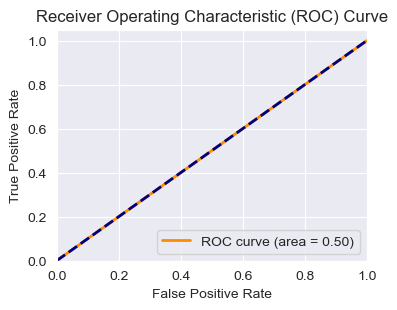

In [101]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,svc_pred)
## Define AUC 
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# 6. K Nearest Neighbors

In [102]:
## Define Model
knn = KNeighborsClassifier()

# Train Model
knn.fit(x_train_resampled,y_train_resampled)

KNeighborsClassifier()

In [103]:
## Predict Test data
knn_pred = knn.predict(X_test)

--------------------------------------------------
K-Nearest Neighbours Model Accuracy: 0.668507814172554
--------------------------------------------------
K-Nearest Neighbours Model ROC AUC Score: 0.5180423079060197
--------------------------------------------------
K-Nearest Neighbours Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.22      0.27      0.24      4677
           1       0.81      0.77      0.79     18678

    accuracy                           0.67     23355
   macro avg       0.52      0.52      0.52     23355
weighted avg       0.69      0.67      0.68     23355

--------------------------------------------------


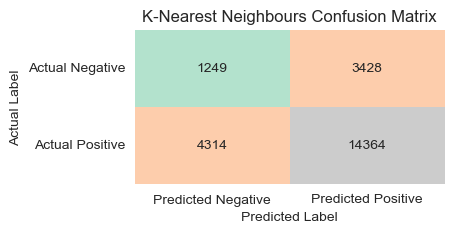

In [104]:
### Performance Evaluation

### Accuracy Score
knn_accuracy = accuracy_score(y_test, knn_pred)
print("-"*50)
print("K-Nearest Neighbours Model Accuracy:", knn_accuracy)

### ROC AUC Score
knn_roc = roc_auc_score(y_test, knn_pred)
print("-"*50)
print("K-Nearest Neighbours Model ROC AUC Score:", knn_roc)

### Classification Report
print("-"*50)
print("K-Nearest Neighbours Model Classiffication Report: \n\n",classification_report(y_test, knn_pred))
print("-"*50)

## Confusion Matrix
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(knn_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('K-Nearest Neighbours Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

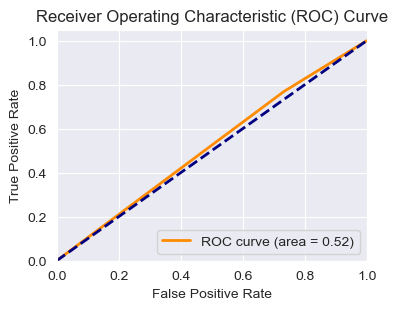

In [105]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,knn_pred)
## Define AUC
roc_auc = auc(fpr, tpr)

## PLot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

### 7. XG Boosting

In [106]:
## Define Model
xgc  = XGBClassifier()

# Train Model
xgc.fit(x_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [107]:
## Predict Test data
xgc_pred = xgc.predict(X_test)

--------------------------------------------------
XG Boosting Model Accuracy: 0.7967030614429458
--------------------------------------------------
XG Boosting Model ROC AUC Score: 0.5404916693230076
--------------------------------------------------
XG Boosting Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.47      0.11      0.18      4677
           1       0.81      0.97      0.88     18678

    accuracy                           0.80     23355
   macro avg       0.64      0.54      0.53     23355
weighted avg       0.74      0.80      0.74     23355

--------------------------------------------------


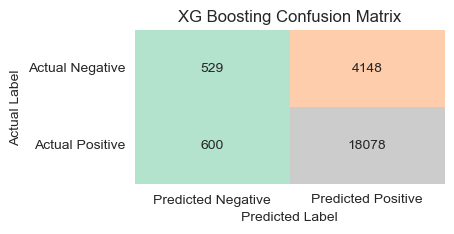

In [108]:
### Performance Evaluation

### Accuracy Score
xgc_accuracy = accuracy_score(y_test, xgc_pred)
print("-"*50)
print("XG Boosting Model Accuracy:", xgc_accuracy)

### ROC AUC Score
xgc_roc = roc_auc_score(y_test, xgc_pred)
print("-"*50)
print("XG Boosting Model ROC AUC Score:", xgc_roc)

### Classification Report
print("-"*50)
print("XG Boosting Model Classiffication Report: \n\n",classification_report(y_test, xgc_pred))
print("-"*50)

## Confusion Matrix
xgc_confusion_matrix = confusion_matrix(y_test, xgc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(xgc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('XG Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

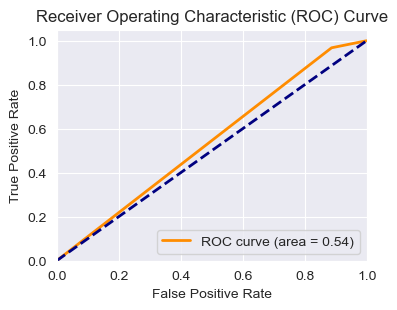

In [109]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,xgc_pred)
## Define AUC
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

## 8. Neural Networks

In [110]:
## Define Model
nnc = MLPClassifier()

# Train Model
nnc.fit(x_train_resampled,y_train_resampled)

MLPClassifier()

In [111]:
## Predict Test data
nnc_pred = nnc.predict(X_test)

--------------------------------------------------
Neural Network Model Accuracy: 0.7952472703917791
--------------------------------------------------
Neural Network Model ROC AUC Score: 0.5105720312804677
--------------------------------------------------
Neural Network Model Classiffication Report: 

               precision    recall  f1-score   support

           0       0.38      0.04      0.07      4677
           1       0.80      0.99      0.89     18678

    accuracy                           0.80     23355
   macro avg       0.59      0.51      0.48     23355
weighted avg       0.72      0.80      0.72     23355

--------------------------------------------------


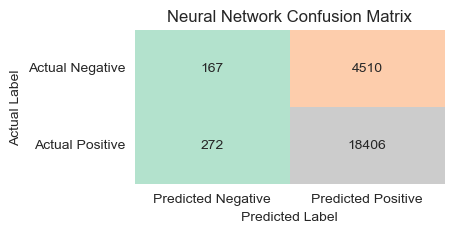

In [112]:
### Performance Evaluation

### Accuracy Score
nnc_accuracy = accuracy_score(y_test, nnc_pred)
print("-"*50)
print("Neural Network Model Accuracy:", nnc_accuracy)

### ROC AUC Score
nnc_roc = roc_auc_score(y_test, nnc_pred)
print("-"*50)
print("Neural Network Model ROC AUC Score:", nnc_roc)

### Classification Report
print("-"*50)
print("Neural Network Model Classiffication Report: \n\n",classification_report(y_test, nnc_pred))
print("-"*50)

## Confusion Matrix
nnc_confusion_matrix = confusion_matrix(y_test, nnc_pred)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(nnc_confusion_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

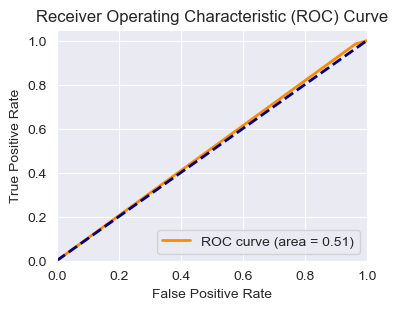

In [113]:
## Plotting ROC Curve

## Define fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,nnc_pred)
## Define AUC
roc_auc = auc(fpr, tpr)

## Plot ROC Curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Compare Models and Find best Model

In [114]:
## List of tuples containing (model, accuracy)
model_accuracy_list = [('Logistic Regression', lgr_accuracy, lgr_roc), ("Decision Tree Classifier", dtc_accuracy, dtc_roc), 
                       ("Random Forest Classifier", rfc_accuracy, rfc_roc),
                       ("Gradient Boosting Classifier", gbc_accuracy, gbc_roc),
                      ('Support Vector Machines', svc_accuracy, svc_roc),
                       ('KNeighbours Classifiers', knn_accuracy, knn_roc),
                         ('XG Boosting', xgc_accuracy, xgc_roc), ('Neural Network', nnc_accuracy, nnc_roc)] 
model_accuracy_list

[('Logistic Regression', 0.7655320059944337, 0.5733327502089529),
 ('Decision Tree Classifier', 0.6862770284735603, 0.5528720901904536),
 ('Random Forest Classifier', 0.7943909227146221, 0.5370427015321473),
 ('Gradient Boosting Classifier', 0.7973453222008136, 0.5254268329663222),
 ('Support Vector Machines', 0.7997430956968529, 0.5),
 ('KNeighbours Classifiers', 0.668507814172554, 0.5180423079060197),
 ('XG Boosting', 0.7967030614429458, 0.5404916693230076),
 ('Neural Network', 0.7952472703917791, 0.5105720312804677)]

In [115]:
## Threshold for minimum accuracy 
min_accuracy_threshold = 0.75

best_model = None
best_accuracy = 0.0

## Find the best model with the highest accuracy
for model, accuracy, roc_score in model_accuracy_list:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_roc = roc_score

## Best Model Display
if best_model is not None:
    print("Best Model:", best_model)
    print('-'*50)
    print("Validation Accuracy of the Best Model:", best_accuracy)
    print('-'*50)
    print('ROC AUC Score of the Best Model:', best_roc)
else:
    print("No model met the accuracy threshold.")

Best Model: Support Vector Machines
--------------------------------------------------
Validation Accuracy of the Best Model: 0.7997430956968529
--------------------------------------------------
ROC AUC Score of the Best Model: 0.5


## Hyperparameter Tuning

From the list of models, **"XG Boosting Model"** has the highest accuracy (0.9059) among all models. This model would be a good candidate for hyperparameter tuning and cross-validation to further improve its performance.

## Tuning : RandomSearchCV

In [116]:
# Create a XGBoostingClassifier
Xg_classifier = XGBClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10),
}

In [117]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    Xg_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)


# Fit the model to the data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A21CB099C0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A21CE95C30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A21CE944F0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001A21CE97A00>},
                   random_state=42, scoring='accuracy', verbose=1)

In [118]:
# Get the best parameters and best estimator
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_estimator = random_search.best_estimator_
print('Best Model :' , best_estimator)

Best Hyperparameters: {'colsample_bytree': 0.7599443886861021, 'learning_rate': 0.023999698964084628, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 157, 'subsample': 0.8056937753654446}
Best Model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7599443886861021, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.023999698964084628,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=157, n_jobs=None,
              num_parallel_tree=None, random_state=None, ..

Accuracy of Best Model : 0.8015414258188824
--------------------------------------------------
ROC AUC Score of Best Model: 0.5116222218055413
--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.03      0.05      4677
           1       0.80      1.00      0.89     18678

    accuracy                           0.80     23355
   macro avg       0.70      0.51      0.47     23355
weighted avg       0.76      0.80      0.72     23355

--------------------------------------------------


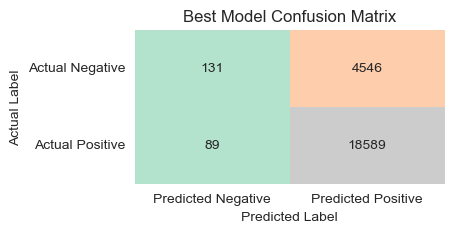

In [119]:
# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Evaluate the best model

## Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Best Model :", accuracy)
print('-'*50)

## ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score of Best Model:", roc_auc)
print('-'*50)

## CLassification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print('-'*50)

## Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Best Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

There is an increase in accuracy of model performance with original training data

## Cross Validation

In [120]:
# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(best_estimator, X_train, y_train, cv=kf, scoring='accuracy')

# Print the results
print("Cross-Validation Results:", cv_results)
print("Average Accuracy:", cv_results.mean())

Cross-Validation Results: [0.80713827 0.79355904 0.80218369 0.79365079 0.79693522]
Average Accuracy: 0.7986934018757219


# Hyperparameter tuning and cross-validation results:

The best estimator achieved an accuracy of approximately 80.7%, which is consistent with the cross-validation accuracy of 79.8%. This suggests that the chosen hyperparameters provide a stable and reliable model with minimal variance across different folds.

## Feature Importance

In [121]:
feature_importances = best_estimator.feature_importances_

In [122]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance = feature_importance_df.sort_values(by='Importance', ascending=True)

In [123]:
# Display feature importances
print(feature_importance)

                 Feature  Importance
2       earliest_cr_line    0.011659
3             emp_length    0.012231
25             total_acc    0.012466
21            revol_util    0.012990
19               purpose    0.012999
18  pub_rec_bankruptcies    0.013732
20             revol_bal    0.013997
4              emp_title    0.014218
13        num_actv_bc_tl    0.014306
0             addr_state    0.014447
6         fico_range_low    0.014455
17               pub_rec    0.014610
5        fico_range_high    0.014956
16              open_acc    0.015651
1             annual_inc    0.015690
24                 title    0.016081
26   verification_status    0.018577
15           tot_cur_bal    0.018714
9       application_type    0.019446
12             loan_amnt    0.020672
10   initial_list_status    0.021246
14              mort_acc    0.025430
8         home_ownership    0.025635
11              int_rate    0.032792
23                  term    0.054616
22             sub_grade    0.213164
7

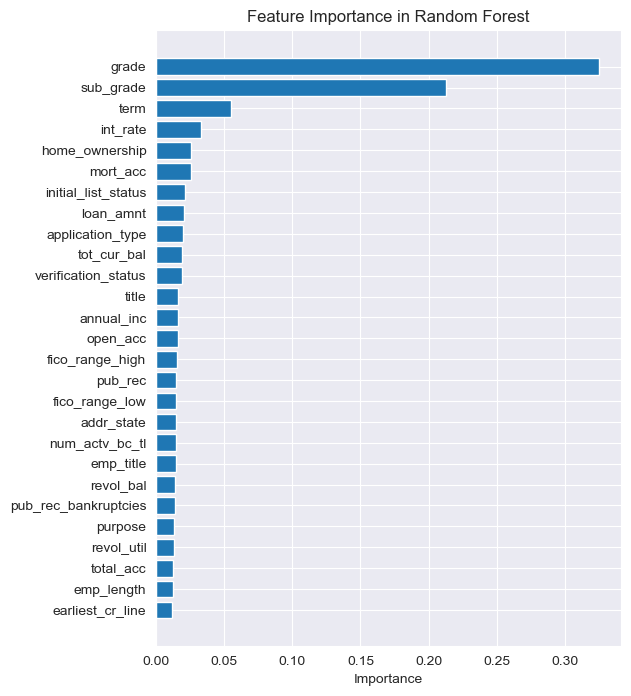

In [124]:
# Plot feature importances
plt.figure(figsize=(6, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

Feature importances indicate the contribution of each feature to the model's predictions.A higher importance value suggests a stronger influence on the model's decision-making.

Features with the highest importance:
'grade' (33%) and 'sub_grade' (21%) significantly impact the model, indicating that economic factors play a crucial role in predicting the outcome.

## Predictions On Unseen Data

In [125]:
## Read test.csv
test = pd.read_csv('test_loan_data.csv')
## Shape pd test.csv
test.shape

(20000, 27)

In [126]:
test.head(10)

addr_state  annual_inc earliest_cr_line emp_length  \
0         MO     50000.0         May-2012     1 year   
1         HI     92000.0         Dec-2001  10+ years   
2         TX     89000.0         Mar-1989  10+ years   
3         CA     33000.0         Nov-2004    9 years   
4         MI     35580.0         Feb-1997        NaN   
5         MO     32510.0         Aug-2000  10+ years   
6         NJ     38000.0         Mar-2006   < 1 year   
7         FL     45000.0         Aug-1991  10+ years   
8         CA     50000.0         Sep-1998   < 1 year   
9         GA     67000.0         Nov-1993        NaN   

                           emp_title  fico_range_high  fico_range_low grade  \
0                   Tower technician            719.0           715.0     C   
1                         Supervisor            684.0           680.0     B   
2            APPLICATIONS PROGRAMMER            679.0           675.0     B   
3  San Diego Unified School District            674.0           670.0     C   
4                                NaN            704.0           700.0     B   
5              Order processing tech            724.0           720.0     B   
6                 Script Coordinator            814.0           810.0     A   
7                  Ruffe Systems Inc            674.0           670.0     C   
8                     Member/Manager            684.0           680.0     D   
9                                NaN            744.0           740.0     B   

  home_ownership application_type initial_list_status  int_rate  loan_amnt  \
0            OWN       Individual                   f     13.99     5000.0   
1           RENT       Individual                   f     10.99    30000.0   
2       MORTGAGE       Individual                   w     10.15    16000.0   
3           RENT       Individual                   f     13.68    10000.0   
4       MORTGAGE       Individual                   f     14.09     4000.0   
5       MORTGAGE       Individual                   w      9.17    14950.0   
6           RENT       Individual                   f      6.72     2800.0   
7           RENT       Individual                   w     16.29    19750.0   
8           RENT       Individual                   w     16.99     9675.0   
9       MORTGAGE       Individual                   w     10.42     5000.0   

   num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0             1.0       0.0      33395.0       9.0      0.0   
1             2.0       2.0     229832.0      11.0      0.0   
2             5.0       2.0     181616.0      15.0      0.0   
3             6.0       0.0      30603.0      12.0      1.0   
4             2.0       4.0     124597.0       8.0      0.0   
5             5.0       0.0      15111.0      15.0      0.0   
6             1.0       0.0      15216.0      12.0      0.0   
7             8.0       0.0      47322.0      14.0      1.0   
8             6.0       0.0      33271.0      12.0      2.0   
9             5.0       7.0     288613.0      14.0      0.0   

   pub_rec_bankruptcies             purpose  revol_bal  revol_util sub_grade  \
0                   0.0  debt_consolidation     2568.0         9.8        C4   
1                   0.0  debt_consolidation    30394.0        75.4        B2   
2                   0.0         credit_card    38400.0        75.3        B2   
3                   1.0  debt_consolidation    21224.0        69.4        C1   
4                   0.0  debt_consolidation     3471.0        39.4        B5   
5                   0.0  debt_consolidation    15111.0        41.4        B2   
6                   0.0  debt_consolidation      651.0         1.8        A3   
7                   1.0         credit_card    15643.0        72.8        C4   
8                   1.0  debt_consolidation     9048.0        45.0        D3   
9                   0.0  debt_consolidation     8149.0        10.3        B3   

         term                    title  total_acc verification_status  
0   36 mo

# # Handling Null values in Test Data

In [127]:
## Sum of Null values
test.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              1258
emp_title               1378
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          1011
mort_acc                 704
tot_cur_bal             1011
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      11
purpose                    0
revol_bal                  0
revol_util                13
sub_grade                  0
term                       0
title                    247
total_acc                  0
verification_status        0
dtype: int64

In [128]:
## Imputing Null values

data['emp_length'].fillna(data['emp_length'].mode()[0], inplace=True)
data['emp_title'].fillna(data['emp_title'].mode()[0], inplace=True)
data['title'].fillna(data['title'].mode()[0], inplace=True)

data.num_actv_bc_tl = data.num_actv_bc_tl.fillna(data.num_actv_bc_tl.mean())
data.mort_acc = data.mort_acc.fillna(data.mort_acc.mean())

data['tot_cur_bal'].fillna(data['tot_cur_bal'].mean(), inplace=True)
data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mean(), inplace=True)
data['revol_util'].fillna(data['revol_util'].mean(), inplace=True)

# ## Seperating categorical and numerical columns

In [129]:
catcol = []
numcol = []

for col in test.columns:
    if test[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)
        

catcol, numcol

(['addr_state',
  'earliest_cr_line',
  'emp_length',
  'emp_title',
  'grade',
  'home_ownership',
  'application_type',
  'initial_list_status',
  'purpose',
  'sub_grade',
  'term',
  'title',
  'verification_status'],
 ['annual_inc',
  'fico_range_high',
  'fico_range_low',
  'int_rate',
  'loan_amnt',
  'num_actv_bc_tl',
  'mort_acc',
  'tot_cur_bal',
  'open_acc',
  'pub_rec',
  'pub_rec_bankruptcies',
  'revol_bal',
  'revol_util',
  'total_acc'])

## Encoding Categorical Columns Of Unseen Data

In [130]:
for col in catcol:
    test[col] = encoder.fit_transform(test[col])

In [131]:
## scaling
test[numcol] = sc_x.fit_transform(test[numcol])

In [132]:
test

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0              23   -0.309267               425           0       8992   
1              11    0.180936               126           1       8525   
2              42    0.145921               356           1         98   
3               4   -0.507683               462           9       7462   
4              21   -0.477570               167          11      11180   
...           ...         ...               ...         ...        ...   
19995          23   -0.443489               563           4      10371   
19996          44    0.040878               123           3       1980   
19997          42    0.215950               409           1       6176   
19998           9   -0.484340               370           1       5018   
19999           9   -0.534527                26          10      10832   

       fico_range_high  fico_range_low  grade  home_ownership  \
0             0.591656        0.591674      2               2   
1            -0.510089       -0.510096      1               3   
2            -0.667482       -0.667492      1               1   
3            -0.824874       -0.824888      2               3   
4             0.119480        0.119487      1               1   
...                ...             ...    ...             ...   
19995        -0.667482       -0.667492      3               3   
19996        -0.824874       -0.824888      3               1   
19997         0.906441        0.906466      1               1   
19998         3.424717        3.424798      0               1   
19999        -1.139658       -1.139679      4               1   

       application_type  initial_list_status  int_rate  loan_amnt  \
0                     0                    0  0.153094  -1.069855   
1                     0                    0 -0.475586   1.767454   
2                     0                    1 -0.651616   0.178561   
3                     0                    0  0.088130  -0.502393   
4                     0                    0  0.174050  -1.183347   
...                 ...                  ...       ...        ...   
19995                 0                    1  0.903317  -0.502393   
19996                 0                    0  1.186223   0.448105   
19997                 0                    0 -0.427387   2.334915   
19998                 0                    1 -1.125221  -1.069855   
19999                 0                    0  1.045818  -0.502393   

       num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc   pub_rec  \
0           -1.178623 -0.842447    -0.691754 -0.470876 -0.365681   
1           -0.728322  0.166889     0.568716 -0.107749 -0.365681   
2            0.622582  0.166889     0.259330  0.618506 -0.365681   
3            1.072883 -0.842447    -0.709670  0.073815  1.392400   
4           -0.728322  1.176224    -0.106542 -0.652440 -0.365681   
...               ...       ...          ...       ...       ...   
19995       -1.178623 -0.842447    -0.710992 -0.289313 -0.365681   
19996       -0.728322  1.680892     2.266611 -0.470876 -0.365681   
19997       -0.728322  1.176224     0.922166 -0.289313 -0.365681   
19998       -1.178623 -0.842447    -0.853390 -0.470876 -0.365681   
19999        1.072883 -0.842447    -0.596679  0.255378 -0.365681   

       pub_rec_bankruptcies  purpose  revol_bal  revol_util  sub_grade  term  \
0                 -0.349434        2  -0.621159   -1.709966         13     0   
1                 -0.349434        2   0.648464    0.966590          6     0   
2                 -0.349434        1   1.013756    0.962510          6     1   
3                  2.323674        2   0.230063    0.721783         10     0   
4                 -0.349434        2  -0.579958   -0.502252          9     0   
...                     ...      ...        ...         ...        ...   ...   
19995             -0.349434        2  -0.472962    0.338252         18     0   
19996             -0.349434        2  -0.104750    

### Making Predictions on Unseen Data Using Best Model

In [133]:
# Make predictions on the test set
test_pred = best_estimator.predict(test)

In [134]:
## Adding Decision Column
test['LoanSanction'] = test_pred

## Value Counts
test['LoanSanction'].value_counts()

1    19980
0       20
Name: LoanSanction, dtype: int64

In [135]:
test.head()

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0          23   -0.309267               425           0       8992   
1          11    0.180936               126           1       8525   
2          42    0.145921               356           1         98   
3           4   -0.507683               462           9       7462   
4          21   -0.477570               167          11      11180   

   fico_range_high  fico_range_low  grade  home_ownership  application_type  \
0         0.591656        0.591674      2               2                 0   
1        -0.510089       -0.510096      1               3                 0   
2        -0.667482       -0.667492      1               1                 0   
3        -0.824874       -0.824888      2               3                 0   
4         0.119480        0.119487      1               1                 0   

   initial_list_status  int_rate  loan_amnt  num_actv_bc_tl  mort_acc  \
0                    0  0.153094  -1.069855       -1.178623 -0.842447   
1                    0 -0.475586   1.767454       -0.728322  0.166889   
2                    1 -0.651616   0.178561        0.622582  0.166889   
3                    0  0.088130  -0.502393        1.072883 -0.842447   
4                    0  0.174050  -1.183347       -0.728322  1.176224   

   tot_cur_bal  open_acc   pub_rec  pub_rec_bankruptcies  purpose  revol_bal  \
0    -0.691754 -0.470876 -0.365681             -0.349434        2  -0.621159   
1     0.568716 -0.107749 -0.365681             -0.349434        2   0.648464   
2     0.259330  0.618506 -0.365681             -0.349434        1   1.013756   
3    -0.709670  0.073815  1.392400              2.323674        2   0.230063   
4    -0.106542 -0.652440 -0.365681             -0.349434        2  -0.579958   

   revol_util  sub_grade  term  title  total_acc  verification_status  \
0   -1.709966         13     0    485  -1.159012                    1   
1    0.966590          6     0    485   0.824706                    1   
2    0.962510          6     1    352   1.320636                    0   
3    0.721783         10     0     83  -0.745738                    0   
4   -0.502252          9     0      5  -0.497773                    2   

   LoanSanction  
0             1  
1             1  
2             1  
3             1  
4             1

### Getting exact list of Customers for Loan Acceptance

In [136]:
## Read again
candidate = pd.read_csv('test_loan_data.csv')

candidate.shape

(20000, 27)

In [137]:
candidate.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         MO     50000.0         May-2012     1 year   
1         HI     92000.0         Dec-2001  10+ years   
2         TX     89000.0         Mar-1989  10+ years   
3         CA     33000.0         Nov-2004    9 years   
4         MI     35580.0         Feb-1997        NaN   

                           emp_title  fico_range_high  fico_range_low grade  \
0                   Tower technician            719.0           715.0     C   
1                         Supervisor            684.0           680.0     B   
2            APPLICATIONS PROGRAMMER            679.0           675.0     B   
3  San Diego Unified School District            674.0           670.0     C   
4                                NaN            704.0           700.0     B   

  home_ownership application_type initial_list_status  int_rate  loan_amnt  \
0            OWN       Individual                   f     13.99     5000.0   
1           RENT       Individual                   f     10.99    30000.0   
2       MORTGAGE       Individual                   w     10.15    16000.0   
3           RENT       Individual                   f     13.68    10000.0   
4       MORTGAGE       Individual                   f     14.09     4000.0   

   num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0             1.0       0.0      33395.0       9.0      0.0   
1             2.0       2.0     229832.0      11.0      0.0   
2             5.0       2.0     181616.0      15.0      0.0   
3             6.0       0.0      30603.0      12.0      1.0   
4             2.0       4.0     124597.0       8.0      0.0   

   pub_rec_bankruptcies             purpose  revol_bal  revol_util sub_grade  \
0                   0.0  debt_consolidation     2568.0         9.8        C4   
1                   0.0  debt_consolidation    30394.0        75.4        B2   
2                   0.0         credit_card    38400.0        75.3        B2   
3                   1.0  debt_consolidation    21224.0        69.4        C1   
4                   0.0  debt_consolidation     3471.0        39.4        B5   

         term                    title  total_acc verification_status  
0   36 months       Debt consolidation       11.0     Source Verified  
1   36 months       Debt consolidation       35.0     Source Verified  
2   60 months  Credit card refinancing       41.0        Not Verified  
3   36 months           Breathing Room       16.0        Not Verified  
4   36 months       debitconsolidation       19.0            Verified

In [138]:
## Adding Decision Column to original Test data
candidate['LoanSanction'] = test_pred

## GEtting customers count for marketing decision 1
candidate[candidate['LoanSanction']==1].shape

(19980, 28)

In [139]:
## Creating new dataframe with potential customers list
customers_list = candidate[candidate['LoanSanction']==1]

In [142]:
## Exporting to Excel file
customers_list.to_excel('LoanSanction_list.xlsx', index=False)

In [143]:
## List of Potential Customers
customers_list

addr_state  annual_inc earliest_cr_line emp_length  \
0             MO     50000.0         May-2012     1 year   
1             HI     92000.0         Dec-2001  10+ years   
2             TX     89000.0         Mar-1989  10+ years   
3             CA     33000.0         Nov-2004    9 years   
4             MI     35580.0         Feb-1997        NaN   
...          ...         ...              ...        ...   
19995         MO     38500.0         Sep-2010    4 years   
19996         VA     80000.0         Dec-1998    3 years   
19997         TX     95000.0         May-1996  10+ years   
19998         FL     35000.0         Mar-2003  10+ years   
19999         FL     30700.0         Apr-1994   < 1 year   

                               emp_title  fico_range_high  fico_range_low  \
0                       Tower technician            719.0           715.0   
1                             Supervisor            684.0           680.0   
2                APPLICATIONS PROGRAMMER            679.0           675.0   
3      San Diego Unified School District            674.0           670.0   
4                                    NaN            704.0           700.0   
...                                  ...              ...             ...   
19995               lighting coordinator            679.0           675.0   
19996      Contract & Compliance Manager            674.0           670.0   
19997                         Pharmacist            729.0           725.0   
19998                Manager In Training            809.0           805.0   
19999                      rv technician            664.0           660.0   

      grade home_ownership application_type initial_list_status  int_rate  \
0         C            OWN       Individual                   f     13.99   
1         B           RENT       Individual                   f     10.99   
2         B       MORTGAGE       Individual                   w     10.15   
3         C           RENT       Individual                   f     13.68   
4         B       MORTGAGE       Individual                   f     14.09   
...     ...            ...              ...                 ...       ...   
19995     D           RENT       Individual                   w     17.57   
19996     D       MORTGAGE       Individual                   f     18.92   
19997     B       MORTGAGE       Individual                   f     11.22   
19998     A       MORTGAGE       Individual                   w      7.89   
19999     E       MORTGAGE       Individual                   f     18.25   

       loan_amnt  num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0         5000.0             1.0       0.0      33395.0       9.0      0.0   
1        30000.0             2.0       2.0     229832.0      11.0      0.0   
2        16000.0             5.0       2.0     181616.0      15.0      0.0   
3        10000.0             6.0       0.0      30603.0      12.0      1.0   
4         4000.0             2.0       4.0     124597.0       8.0      0.0   
...          ...             ...       ...          ...       ...      ...   
19995    10000.0             1.0       0.0      30397.0      10.0      0.0   
19996    18375.0             2.0       5.0     494439.0       9.0      0.0   
19997    35000.0             2.0       4.0     284915.0      10.0      0.0   
19998     5000.0             1.0       0.0       8205.0       9.0      0.0   
19999    10000.0             6.0       0.0      48212.0      13.0      0.0   

       pub_rec_bankruptcies             purpose  revol_bal  revol_util  \
0                       0.0  debt_consolidation     2568.0         9.8   
1                       0.0  debt_consolidation    30394.0        75.4   
2                       0.0         credit_card    38400.0        75.3   
3                       1.0  debt_consolidation    21224.0        69.4   
4                       0.0  debt_consolidation     3471.0        39.4   
...                     ...                 ...       

This is the list of potential customers. This list, combined with strategic insights, shows us the customers who can repay their loan on time without defaulting.